# Comparison of Classification Algorithms - Logistic Regression and SVM

## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
from sklearn import datasets

### Importing Iris Dataset

In [2]:
# data=pd.read_csv('ex2data1.txt',header=None)
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting of original dataset

Text(0, 0.5, 'sepal_width')

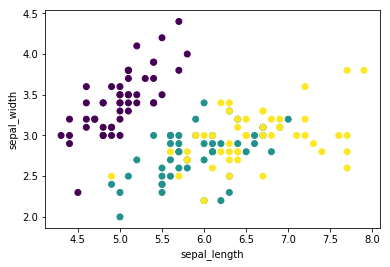

In [25]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]
# scatter_matrix(X,figsize=(15,15))
# plt.scatter(data[0][y==1],data[1][y==1])
# plt.scatter(data[0][y==0],data[1][y==0],color='red',marker='+')
plt.show()

#sns.pairplot(data,hue='species')

y=y.astype('category')
y=y.cat.codes
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

### Mixing Iris Versicolour and  Iris Virginica Classes

In [5]:
y=y.apply(lambda x:x if x==0 else 1)
#y = y.apply(lambda x:x if x==1 else 0)

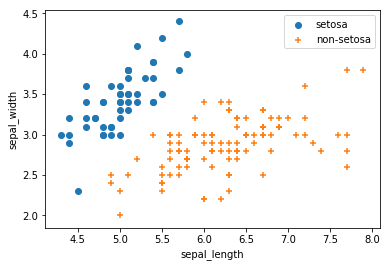

In [6]:
plt.scatter(X.iloc[:,0][y==0],X.iloc[:,1][y==0],label='setosa')
plt.scatter(X.iloc[:,0][y==1],X.iloc[:,1][y==1],marker='+',label='non-setosa')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

In [7]:
m=len(y)
X=np.hstack((np.ones((m,1)),X))
y=y[:,np.newaxis]
theta=np.zeros((X.shape[1],1))


In [8]:
theta.shape,X.shape,y.shape

((3, 1), (150, 3), (150, 1))

### Sigmoid Function and Cost Function

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [10]:
def computeCost(theta,X,y):
    return ((-1)/m)*np.sum(np.multiply(y,np.log(sigmoid(np.dot(X,theta))))+np.multiply((1-y),np.log(1-(sigmoid(np.dot(X,theta))))))

In [11]:
J=computeCost(theta,X,y)
print(J)

0.6931471805599454


In [12]:
'''

t=[]
alpha=0.002
iterations=100000
min=computeCost(theta,X,y)
for i in range(iterations):
    theta=theta-(alpha/m)*((np.dot(X.T,sigmoid(np.dot(X,theta))-y)))
    t.append(computeCost(theta,X,y))
    if(computeCost(theta,X,y)<min):
        min=computeCost(theta,X,y)
        a=i
    
plt.plot(range(iterations),t)
'''

'\n\nt=[]\nalpha=0.002\niterations=100000\nmin=computeCost(theta,X,y)\nfor i in range(iterations):\n    theta=theta-(alpha/m)*((np.dot(X.T,sigmoid(np.dot(X,theta))-y)))\n    t.append(computeCost(theta,X,y))\n    if(computeCost(theta,X,y)<min):\n        min=computeCost(theta,X,y)\n        a=i\n    \nplt.plot(range(iterations),t)\n'

### Gradient Descent

In [13]:
alpha=0.02
iterations=100000
def gradDescent(X,y,theta,alpha,iterations):
    for i in range(iterations):
        theta=theta-(alpha/m)*((np.dot(X.T,sigmoid(np.dot(X,theta))-y)))
    return theta
theta=gradDescent(X,y,theta,alpha,iterations)    
print(theta)
J=computeCost(theta,X,y)
print(J)


[[ -4.77194322]
 [  6.82731458]
 [-10.35311802]]
0.028787294392446733


In [14]:
'''
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))
temp = opt.fmin_tnc(func = computeCost, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)'''

'\ndef gradient(theta, X, y):\n    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))\ntemp = opt.fmin_tnc(func = computeCost, \n                    x0 = theta.flatten(),fprime = gradient, \n                    args = (X, y.flatten()))\n#the output of above function is a tuple whose first element #contains the optimized values of theta\ntheta_optimized = temp[0]\nprint(theta_optimized)'

In [15]:
print(computeCost(theta,X,y))

0.028787294392446733


### Plotting Decision Boundary

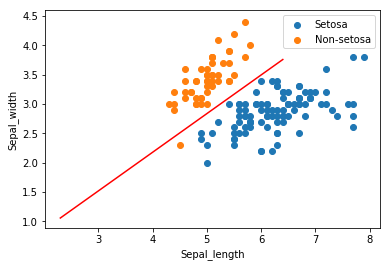

In [16]:
plt.scatter(X[:,1][y.flatten()==1],X[:,2][y.flatten()==1],label='Setosa')
plt.scatter(X[:,1][y.flatten()==0],X[:,2][y.flatten()==0],label='Non-setosa')
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta[2][0]*(theta[0][0] 
          + np.dot(theta[1][0],plot_x))  
decision_boun = plt.plot(plot_x, plot_y,color='red')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend()
plt.show()

### Prediction

In [17]:
pred=sigmoid(np.dot(X,theta))>=0.5

In [18]:
accuracy=np.mean(pred==y)*100
print(accuracy)


99.33333333333333


## SVM - Support Vector Machine

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [20]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

c:\users\aditya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aditya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
pred=model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

